[View in Colaboratory](https://colab.research.google.com/github/Indrajeet90/Data-Scientist-with-Python/blob/master/Importing_Files_in_Python_1.ipynb)

**Exploring working directory**

IPython has a bunch of cool commands, including its magic commands. For example, starting a line with ! gives you complete system shell access. This means that the IPython magic command ! ls will display the contents of your current directory. Your task is to use the IPython magic command ! ls to check out the contents of your current directory.

In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

In [0]:
# Open a file: file
file = open('moby_dick.txt', 'r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


**Importing text files line by line**

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the** readline()** method, which allows you to do this. When a file called file is open, you can print out the first line by executing **file.readline().** If you execute the same command again, the second line will print, and so on.

You can bind a variable file by using a context manager construct:

*with open('huck_finn.txt') as file:*

While still within this construct, the variable file will be bound to **open('huck_finn.txt');** thus, to print the file to the shell, all the code you need to execute is:

*with open('huck_finn.txt') as file:*
    *print(file.read()) *

In [0]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())


# Importing flat files using NumPy


**Using NumPy to import flat files**

In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function** loadtxt()** and see just how easy it can be:

*   The first argument will be the filename.
*   The second will be the delimiter which, in this case, is a comma.



In [0]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


**Customizing NumPy import**
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that **np.loadtxt()** takes that you'll find useful: delimiter changes the delimiter that** loadtxt()** is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows (not indices) you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt,

*   has a header
*   is tab-delimited.



In [0]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
print(data)


**Importing different datatypes**

The file seaslug.txt

*   has a text header, consisting of strings
*   is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. 

Due to the header, if you tried to import it as-is using **np.loadtxt(**), Python would throw you a **ValueError** and tell you that it **could not convert string to float**. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the** skiprows** argument.

['Time' 'Percent']
[0.    0.357]


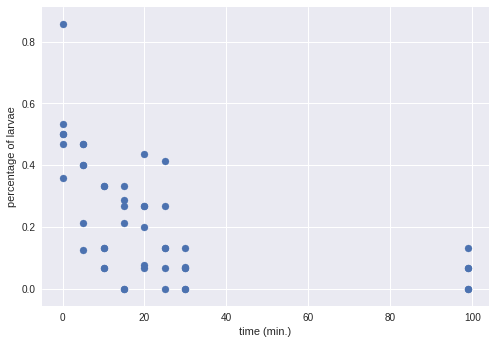

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()



**Working with mixed datatypes**

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function **np.loadtxt()** will freak at this. There is another function, **np.genfromtxt(),** which can handle such structures. If we pass **dtype=None** to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function **np.genfromtxt() **as follows:

**data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)**  
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported.

In [7]:
import numpy as np
data = np.genfromtxt('titanic_sub.csv', delimiter=',', names=True, dtype=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


There is also another function **np.recfromcsv()** that behaves similarly to **np.genfromtxt(),** except that its default dtype is **None.** In this exercise, you'll practice using this to achieve the same result.

In [10]:
# Assign the filename: file
file = 'titanic_sub.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])


[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


# Importing flat files using pandas


**Using pandas to import flat files as DataFrames**

The DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions **read_csv() **and **read_table().**

In [12]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding **numpy** array using the attribute **values**. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [13]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data=pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array=np.array(data.values)

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


**Customizing  pandas import**

The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset **titanic_corrupt.txt**, which

contains comments after the character '#'  
is tab-delimited.  

In [0]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

# Other File Types

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

import os   
wd = os.getcwd()   
os.listdir(wd)  

**Loading a pickled file**

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a sequence of bytes, or a bytestream.

In [0]:
# Import pickle package
import pickle 

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))


**Listing sheets in Excel files**

Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use **pandas** to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Given an Excel file imported into a variable **spreadsheet**, you can retrieve a list of the sheet names using the attribute **spreadsheet.sheet_names.**

In [0]:
!pip install -q xlrd

In [16]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)


['2002', '2004']


**Importing sheets from Excel files**

In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

In [17]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


**Customizing spreadsheet import**

Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet **'battledeath.xlsx' **is already loaded as xl.

As before, you'll use the method **parse()**. This time, however, you'll add the additional arguments **skiprows, names and parse_cols.** These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [0]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=('Country','AAM due to War (2002)'))

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


# Importing SAS/Stata files using pandas

**Importing SAS files**

In this exercise, you'll figure out how to import a SAS file as a DataFrame using **SAS7BDAT** and pandas. The file 'sales.sas7bdat' is going to be imported.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [0]:
!pip install -q sas7bdat

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


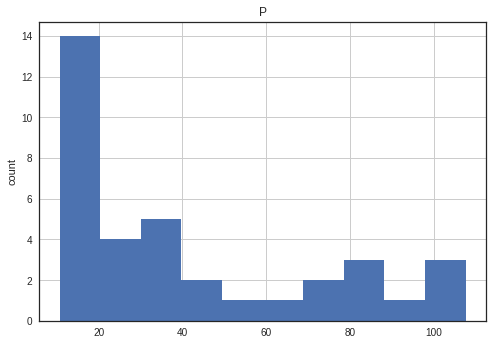

In [24]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas=file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()



**Importing Stata files**

Here, you'll gain expertise in importing Stata files as DataFrames using the **pd.read_stata()** function from pandas. We are going to read the stata file 'disarea.dta'.

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

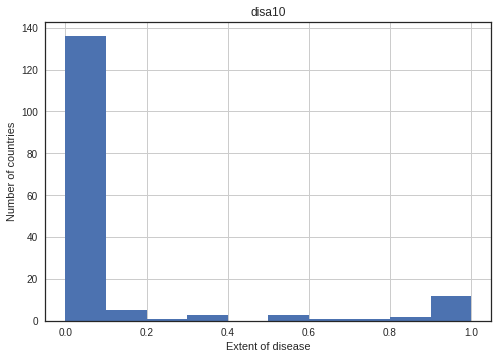

In [25]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df=pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


# Importing HDF5 files

**Using h5py to import HDF5 files**

In this exercise, you'll import 'LIGO_data.hdf5' using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [28]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file='LIGO_data.hdf5'

# Load file: data
data = h5py.File(file,'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for keys in data.keys():
    print(keys)


<class 'h5py._hl.files.File'>
meta
quality
strain


**Extracting data from your HDF5 file**

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group **'strain'**

Strain


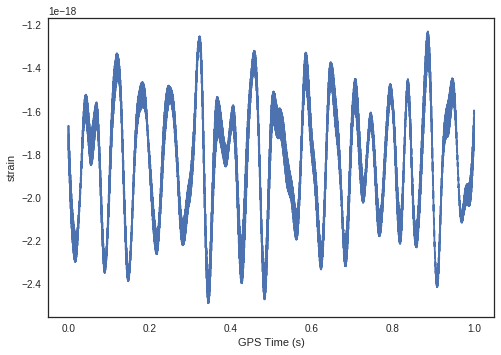

In [29]:
# Get the HDF5 group: group
group=data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain=data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples=10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


# Importing MATLAB files


**Loading .mat files**

In this exercise, you'll figure out how to load a MATLAB file using** scipy.io.loadmat() **and you'll discover what Python datatype it yields.

The file** 'albeck_gene_expression.mat' **is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. 

In [0]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat=scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


**The structure of .mat in Python**

The file 'albeck_gene_expression.mat' is already loaded into the variable mat. The following libraries have already been imported as follows:

In [0]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

# Introduction to relational databases


**Creating a database engine**

You'll create an engine to connect to the SQLite database **'Chinook.sqlite', **which is in your working directory. Remember that to create an engine to connect to 'Northwind.sqlite', Hugo executed the command

**engine = create_engine('sqlite:///Northwind.sqlite')**    
Here, **'sqlite:///Northwind.sqlite' **is called the connection string to the SQLite database Northwind.sqlite. 


In [0]:
!pip install -q sqlalchemy

In [0]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

**The tables in the database**

In this exercise, you'll once again create an engine to connect to **'Chinook.sqlite'.** Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method **table_names() **on the engine and then you will print the list.

In [35]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names=engine.table_names()

# Print the table names to the shell
print(table_names)

[]


# Querying relational databases in Python

**The Hello World of SQL Queries!**

In this exercise, you'll perform the Hello World of SQL queries, SELECT, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query **SELECT * **selects all columns.

In [0]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con=engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

**Customizing the Hello World of SQL Queries**

Now you're going to figure out how to customize your query in order to:

Select specified columns from a table;   
Select a specified number of rows;   
Import column names from the database table.  

**A  query customization**    
*engine = create_engine('sqlite:///Northwind.sqlite')*  
 
*with engine.connect() as con:*   
    *rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")*   
    *df = pd.DataFrame(rs.fetchmany(size=5))*   
    *df.columns = rs.keys()*   

In [0]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title  FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())



**Filtering your database records using SQL's WHERE**

You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())


**Ordering your SQL records with ORDER BY**

You can also order your SQL query results. For example, if you wanted to get all records from the Customer table of the Chinook database and order them in increasing order by the column SupportRepId.

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate ")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

    # Set the DataFrame's column names


# Print head of DataFrame
print(df.head())


# Querying relational databases directly with pandas

**Pandas and The Hello World of SQL Queries!**

You'll first import pandas and create the SQLite **'Chinook.sqlite' **engine. Then you'll query the database to select all records from the Album table.

Recall that to select all records from the Orders table in the Northwind database, Hugo executed the following command:

df = pd.read_sql_query("SELECT * FROM Orders", engine) **bold text**

In [0]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

**Pandas for more complex querying**

Here, you'll become more familiar with the pandas function **read_sql_query()** by using it to execute a more complex query: a **SELECT **statement followed by both a **WHERE** clause **AND** an **ORDER BY** clause.

In [0]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())


**Advanced Querying: exploiting table relationships**

**The power of SQL lies in relationships between tables: INNER JOIN**

Here, you'll perform your first **INNER JOIN!** You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to **INNER JOIN **these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, executed the following SQL query:

The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first INNER JOIN! You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to INNER JOIN these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

**"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"**

In [0]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title,Name FROM Album INNER JOIN Artist ON Album.ArtistId=Artist.ArtistId")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


**Filtering your INNER JOIN**

You're now going to finish this chapter with one final exercise in which you perform an INNER JOIN and filter the result using a WHERE clause.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

**"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"**

In [0]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId  WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())